In [147]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline
data = pd.read_excel("Concrete_Data.xls")
X=data.loc[:, 'Cement (component 1)(kg in a m^3 mixture)':'Age (day)'] 
y = data.iloc[:,-1:]
print(X)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

In [148]:
#using this to make the gradient descent function to converge faster
Scalar = StandardScaler()
X = Scalar.fit_transform(X)

In [149]:
print(X)

[[ 2.47791782 -0.85688631 -0.84713204 ...  0.86316012 -1.21765845
  -0.27973311]
 [ 2.47791782 -0.85688631 -0.84713204 ...  1.05617041 -1.21765845
  -0.27973311]
 [ 0.49144303  0.79553263 -0.84713204 ... -0.52651395 -2.24091255
   3.55306569]
 ...
 [-1.2700575   0.75958527  0.85066095 ... -1.03606111  0.08012724
  -0.27973311]
 [-1.16857975  1.3080724  -0.84713204 ...  0.21464556  0.19118775
  -0.27973311]
 [-0.19401043  0.30850389  0.37696733 ... -1.39506025 -0.15072887
  -0.27973311]]


In [150]:

def obj_function(X, Y, B):
    #MSE function, not LSE. Measures the same thing
    H = X.dot(B)
    H=(H[:, -1:])
    #hypothesis - real
    n = H-Y
    v= len(Y)
    J = np.sum((n) ** 2)/(2 * v)
    return J





In [151]:
def gradient_descent(X, Y, B, alpha, iterations):
    #want to initialize the cost history and get the total length of the training data
    v = len(Y)
    obj_history = [0] * iterations
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        #special case
        if iteration<1:
            loss = h-Y.T
        else:
            h = h[:, -1:]
            loss =h-Y
        #special case 
        if iteration <1:
            gradient = X.T.dot(loss.T) / v
        else: 
            gradient = X.T.dot(loss) / v
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = obj_function(X, Y, B)
        #print(cost)
        obj_history[iteration] = cost
    return B, obj_history

In [152]:
y_train = y[:900]
X_train = X[:m,:8]
#adds a one to the training batch, this represents the B_0 
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_test = y[900:]
X_test = X[900:,:8]
#adds a one to the training batch, this represents the B_0 
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]



8000 8000


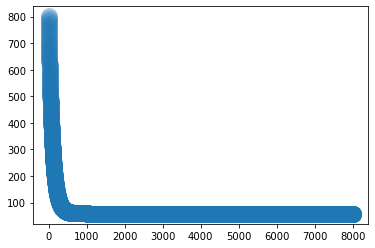

In [153]:
#setting all B's to zer0
B = np.zeros(X_train.shape[1])
newB, history = gradient_descent(X_train, y_train, B, .005, 8000)
iter_size = range(8000)
print(len(iter_size), len(history))
plt.scatter(iter_size,history, s=256, alpha = .3)
plt.plot((iter_size), history, linewidth = .2)
plt.show()

In [154]:

print(newB)
listeofB = []
for i in newB:
    listeofB.append(i[0])


testResults= X_test.dot(listeofB)


[[ 3.58841268e+01  3.58841268e+01  3.58841268e+01  3.58841268e+01
   3.58841268e+01  3.58841268e+01  3.58841268e+01  3.58841268e+01
   3.58841268e+01]
 [ 1.02579497e+01  1.02579497e+01  1.02579497e+01  1.02579497e+01
   1.02579497e+01  1.02579497e+01  1.02579497e+01  1.02579497e+01
   1.02579497e+01]
 [ 6.90235606e+00  6.90235606e+00  6.90235606e+00  6.90235606e+00
   6.90235606e+00  6.90235606e+00  6.90235606e+00  6.90235606e+00
   6.90235606e+00]
 [ 4.40135690e+00  4.40135690e+00  4.40135690e+00  4.40135690e+00
   4.40135690e+00  4.40135690e+00  4.40135690e+00  4.40135690e+00
   4.40135690e+00]
 [-4.86101980e+00 -4.86101980e+00 -4.86101980e+00 -4.86101980e+00
  -4.86101980e+00 -4.86101980e+00 -4.86101980e+00 -4.86101980e+00
  -4.86101980e+00]
 [ 1.76919659e+00  1.76919659e+00  1.76919659e+00  1.76919659e+00
   1.76919659e+00  1.76919659e+00  1.76919659e+00  1.76919659e+00
   1.76919659e+00]
 [ 2.78790414e-02  2.78790414e-02  2.78790414e-02  2.78790414e-02
   2.78790414e-02  2.7879041

[[37.431652039999996], [29.86810032], [56.61287436], [12.45883132], [23.786922], [13.29309728], [39.417342919999996], [46.2293658], [44.51946532], [23.73865868], [26.14492992], [15.520104759999999], [43.5748832], [35.85964676], [41.05140104], [28.98557104], [46.24315532], [26.91714304], [10.53519328], [25.0969264], [29.06830816], [9.735401119999999], [33.79811352], [39.84481804], [26.96540636], [27.234302], [30.647208199999998], [33.05347944], [24.579819399999998], [21.91154728], [30.881630039999997], [15.340841], [24.3385028], [23.8903434], [22.93197176], [29.41304616], [28.629801423999997], [36.804918356], [18.287661424], [32.720462532], [31.420110796000003], [28.937997196], [40.925226931999994], [12.180972492], [25.559564796], [36.443632932], [32.96384756], [23.835874796], [26.233182848000002], [17.959470848000002], [38.630650804], [19.009542795999998], [33.71882378], [8.536402356], [13.461329424], [32.245413568000004], [23.524231644], [29.726068263999995], [49.77327244], [52.446370

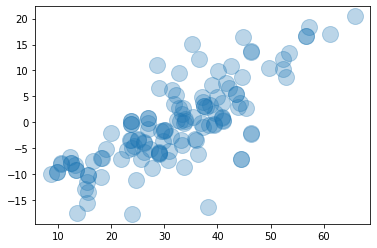

In [155]:
y_test_list= y_test.values.tolist()
print(y_test_list)
ErrorTestList= [0]*130
for i in range(0,len(y_test_list)): 
    ErrorTestList[i] = y_test_list[i]-testResults[i]
plt.scatter(y_test,ErrorTestList, s=256, alpha = .3)
plt.show()

